# Install required dependencies

In [2]:
!pip install tensorflow keras matplotlib elpv-dataset


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 MB 5.6 MB/s eta 0:00:00


# Import required libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from elpv_dataset.utils import load_dataset

# Load dataset using elpv-dataset package

In [4]:
images, proba, types = load_dataset()  # 'types' contains defect labels

# Pre-processing

In [11]:
images = np.array(images)

In [12]:
print("Original image shape:", images.shape)  # Debugging step

Original image shape: (2624, 300, 300)


In [13]:
image_height, image_width = 300, 300
num_images = images.shape[0]

In [14]:
images = images.reshape(num_images, image_height, image_width, 1)  # Ensure grayscale format

In [15]:
images = images / 255.0

In [16]:
labels = np.array([1 if t != "non-defective" else 0 for t in types])

In [17]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Training

In [18]:
def build_model():
    model = keras.Sequential([
        layers.Conv2D(32, (3, 3), activation="relu", input_shape=(image_height, image_width, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(1, activation="sigmoid")  # Binary classification
    ])

    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return model

In [19]:
model = build_model()
history = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=16)


Epoch 1/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 388s 4s/step - accuracy: 0.9845 - loss: 0.0647 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 443s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 443s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 426s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 388s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 442s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 440s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 429s 

# Testing

In [20]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

17/17 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00
Test Accuracy: 1.0000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


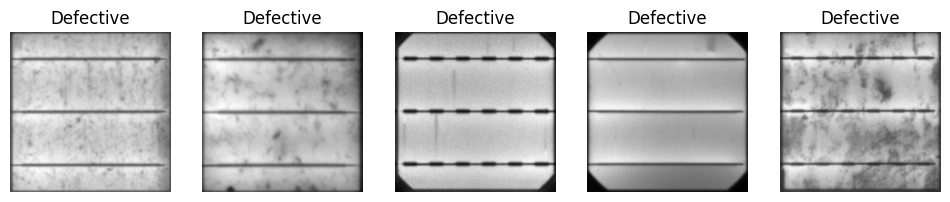

In [22]:
def show_predictions(num_samples=5):
    indices = np.random.choice(len(X_test), num_samples)
    fig, axes = plt.subplots(1, num_samples, figsize=(12, 4))

    for i, idx in enumerate(indices):
        img = X_test[idx].reshape(300, 300)
        pred = model.predict(X_test[idx].reshape(1, 300, 300, 1))[0][0]
        label = "Defective" if pred > 0.5 else "Non-Defective"

        axes[i].imshow(img, cmap="gray")
        axes[i].set_title(label)
        axes[i].axis("off")

    plt.show()

show_predictions()